In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
file_path='kidney_y_new.csv'
data=pd.read_csv(file_path)

In [3]:
X=data.iloc[:,1:]
Y=data['KIQ022']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [4]:
columns=list(X.columns.values)

In [5]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [6]:
y_pred = model.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.51%


In [7]:
param_test = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(200, 1001, 200), 'max_depth': range(5, 16, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [8]:
gsearch2.best_params_

{'max_depth': 9, 'min_samples_split': 200}

In [9]:
gsearch2.best_score_

0.9844978841996171

In [10]:
y_pred = gsearch2.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.43%


In [11]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 70, 'min_samples_split': 1000}, 0.9780457081739472)

In [12]:
def modelfit(alg, trainx,trainy,testx,predictors,printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the test data
    alg.fit(trainx, trainy)
        
    #Predict test set:
    dtrain_predictions = alg.predict(testx)
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp=feat[:10]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

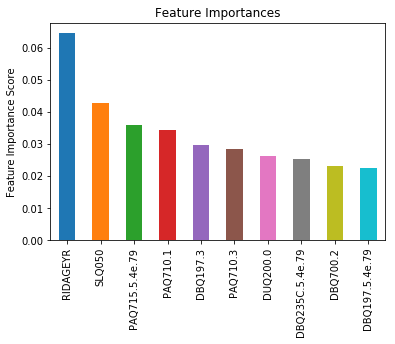

In [13]:
modelfit(gsearch2.best_estimator_, x_train,y_train,x_test,columns)

In [14]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 9, 'alpha': 10}

In [15]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

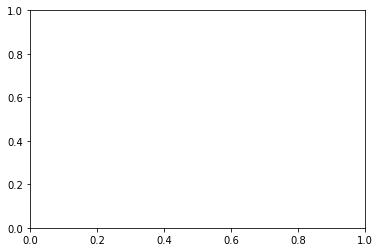

In [16]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()